In [ ]:
import os
import sys
from uuid import uuid4

import numpy as np

import GCode
import GRBL
from utils import picture


# Spindle Cutting Tests

## Objective


## Test Setup

- CSI3010SW @ 31.6V

# Code:

In [4]:
sys.path.append("..")


In [5]:
cnc = GRBL.GRBL(port="/dev/cnc_3018")

print("Laser Mode: {}".format(cnc.laser_mode))


def init(feed=10):
    program = GCode.GCode()
    program.G21()  # Metric Units
    program.G91()  # Absolute positioning.
    program.G1(F=feed)
    return program


def end():
    program = GCode.GCode()
    return program


Laser Mode: None


In [ ]:
c


In [ ]:
cnc.cmd("?")
cnc.reset()


In [4]:
cnc.cmd("!")
status1 = cnc.cmd("?")


In [5]:
cnc.cmd("!")
cnc.reset()
status2 = cnc.cmd("?")


In [6]:
for status in [status1, status2]:
    status_clean = [s for s in status if s != "ok"]
    print(status_clean)
    status_clean2 = [s.strip("<>") for s in status_clean]
    if len(status_clean2) != 1:
        raise Exception(status_clean2)
    status = status_clean2[0]
    print(status)
    stati = status.split("|")
    print(stati)
    print("")


['<Alarm|MPos:0.000,0.000,0.000|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000>']
Alarm|MPos:0.000,0.000,0.000|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000
['Alarm', 'MPos:0.000,0.000,0.000', 'Bf:15,127', 'FS:0,0', 'WCO:0.000,0.000,0.000']

['<Alarm|MPos:0.000,0.000,0.000|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000>']
Alarm|MPos:0.000,0.000,0.000|Bf:15,127|FS:0,0|WCO:0.000,0.000,0.000
['Alarm', 'MPos:0.000,0.000,0.000', 'Bf:15,127', 'FS:0,0', 'WCO:0.000,0.000,0.000']



In [7]:
cnc.kill_alarm()


In [14]:
cnc.cmd(init())


['ok', 'ok', 'ok', 'ok']

In [21]:
cnc.cmd("G0 X-5")


['ok', 'ok']

In [48]:
def test_program(feed=100, dZ=0):
    prog = GCode.GCode()
    prog.M3(S=1000)
    dX = 10
    prog.G1(Z=-dZ, F=25)
    prog.G1(X=dX, F=feed)
    prog.G1(Y=dX, F=feed)
    prog.G1(X=-dX, F=feed)
    prog.G1(Y=-dX, F=feed)
    # prog.G1(Z=dZ, F=25)
    prog.M3(S=0)
    prog.M5()
    return prog


In [49]:
init()


<GCode>[cmds=3]

In [50]:
test_program(dZ=.5)


<GCode>[cmds=9]

In [51]:
cnc.run(init())


0.3116157054901123

In [61]:
np.arange(0.1, 1, 0.1)


array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
for dZ in np.arange(0.1, 2, 0.1):
    cnc.run(test_program2(feed=200, dZ=dZ))


^C
^C
^C
^C


In [1]:
cnc.reset()


NameError: name 'cnc' is not defined

In [ ]:
cnc.cmd("M5")


In [47]:
cnc.run(test_program(feed=100, dZ=1.5))


43.04782295227051

In [57]:
cnc.cmd("G0 Z1")


['ok', 'ok']

In [58]:
cnc.cmd("G0 Y15")


['ok', 'ok']

In [59]:
cnc.cmd("G0 Z-1")


['ok', 'ok']

In [33]:
cnc.cmd("G1")


[]

In [62]:
def test_program2(feed=100, dZ=0):
    prog = GCode.GCode()
    prog.M3(S=1000)
    dX = 10
    prog.G1(Z=-dZ, F=25)
    prog.G1(X=dX, F=feed)
    prog.G1(Y=dX, F=feed)
    prog.G1(X=-dX, F=feed)
    prog.G1(Y=-dX, F=feed)
    prog.M3(S=0)
    prog.M5()
    return prog


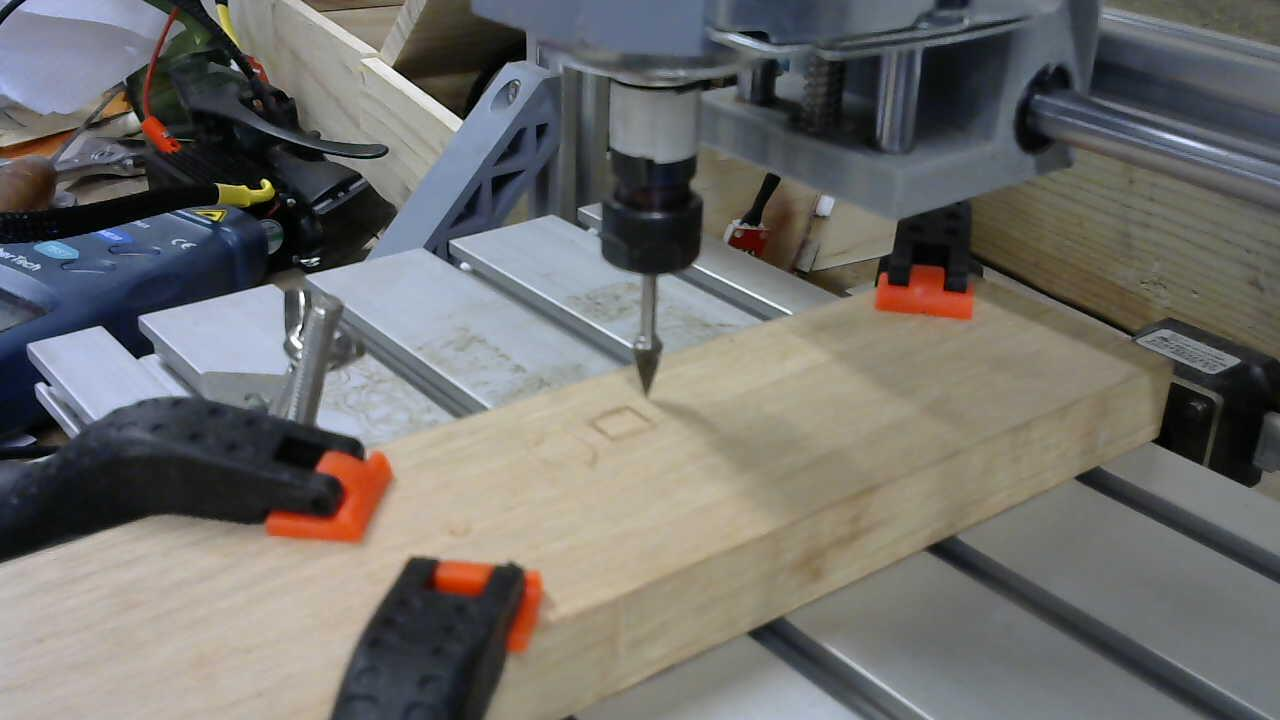

In [64]:
picture()


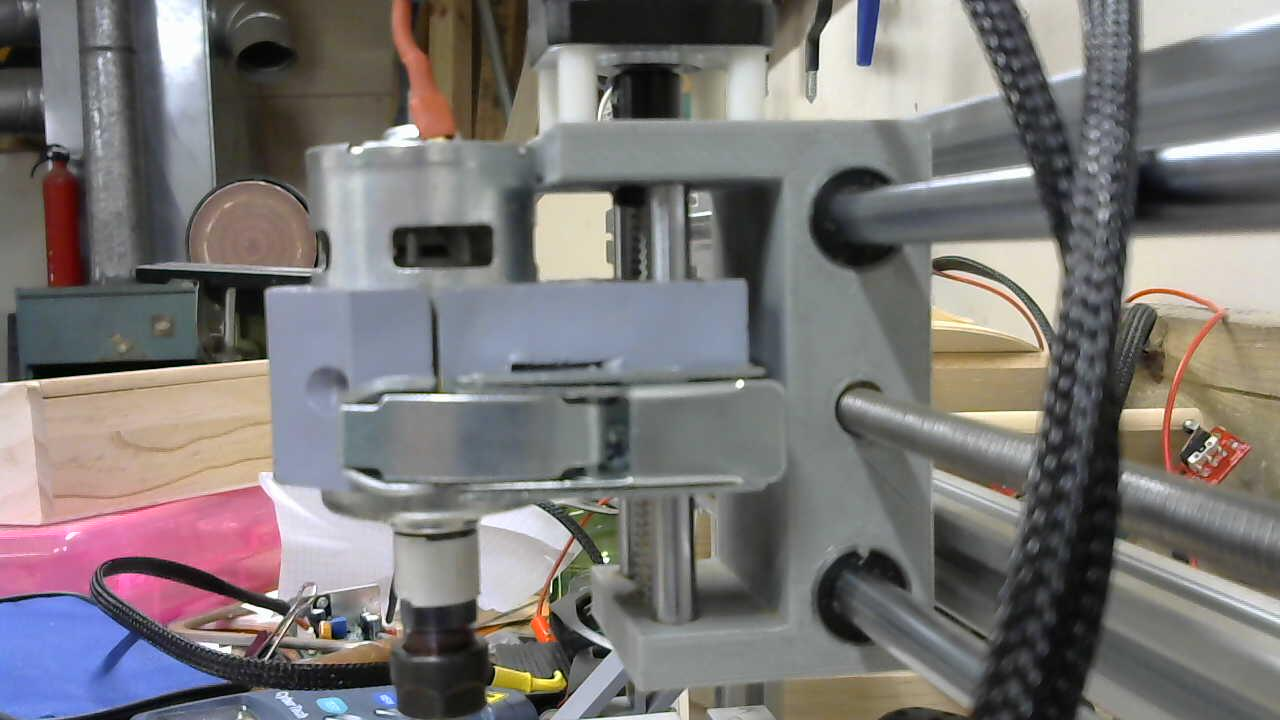

In [65]:
picture()
